In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
file = "electricity-normalized.csv"
data = pd.read_csv(file, header=0)

data.columns = ["date","day","period","nswprice","nswdemand","vicprice","vicdemand","transfer","class"]
label_name = ["class"]
print(len(data), len(data.columns))
data.head()
print(data.columns)

data_features = data
data_features = data_features.drop(labels='class',axis=1)
data_label = data['class']


45312 9
Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'class'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=0.3, random_state=3, shuffle=False)

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [4]:
def plot_graph(param, scores, title="", param_name="", x_range=(1,100), y_range=(0.5,1)):
    plt.figure()
    l_train, = plt.plot(param, scores[0,:],ls='-', marker='o' , color='blue')
    l_test, = plt.plot(param, scores[1,:],ls='-', marker='*', color='red')
    l_cv, = plt.plot(param, scores[2,:], ls='-', marker='+', color='green')
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.title=title
    
    plt.legend(handles=[l_train, l_test, l_cv],labels=['train', 'test', 'validation'], loc='best')
    
    plt.show()

def plot_xticks_graph(param, scores, title="", x_names=[], y_range=(0.5,1)):
    plt.figure()
    l_train, = plt.plot(param, scores[0,:],ls='-', marker='o' , color='blue')
    l_test, = plt.plot(param, scores[1,:],ls='-', marker='*', color='red')
    l_cv, = plt.plot(param, scores[2,:], ls='-', marker='+', color='green')
    
    x_length = range(len(x_names))
    plt.ylim(y_range)
    plt.xticks(x_length, x_names, rotation=45)
    plt.ylabel('accuracy')
    plt.title=title
    
    plt.legend(handles=[l_train, l_test, l_cv],labels=['train', 'test', 'validation'], loc='best')
    
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit

def decision_tree(splits=0.3, depth=None, features=None, maxleafnodes=None):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    clf = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=depth, max_features=features, min_samples_split=minssplit, min_samples_leaf=minsleaf, max_leaf_nodes=maxleafnodes)
    clf = clf.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = clf.score(x_train, y_train)
    score[0,1] = clf.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(clf, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    print(score)
    
    return score

[[0.75858264 0.82943513 0.75725846]]
[[0.77113851 0.8211409  0.77048276]]
[[0.78447569 0.72811535 0.78272383]]
[[0.81057123 0.71597241 0.80680397]]
[[0.82953743 0.7115113  0.8270962 ]]
[[0.84810196 0.7249154  0.84489796]]
[[0.85661738 0.72587408 0.85566176]]
[[0.85389539 0.74046897 0.84421169]]
[[0.86426837 0.75088889 0.85374449]]
[[0.94922737 0.61688847 0.93478261]]


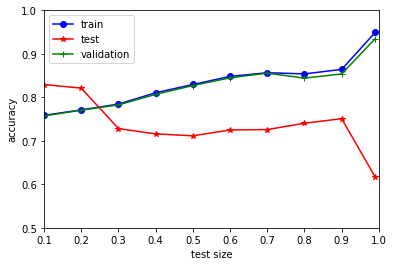

In [74]:
score_dt_splits = np.zeros((3, 10))
for i in range(10):
    score_dt_splits[:,i] = decision_tree(depth=5, splits=test_sizes[i])
plot_graph(param=test_sizes, scores=score_dt_splits, param_name='test size', x_range=(0.1,1))
# print(score_dt_splits)

[[0.7588899  0.75835816 0.76135172]]
[[0.76959364 0.82103056 0.77434483]]
[[0.77113851 0.8211409  0.76984828]]
[[0.81966399 0.79708706 0.80841379]]
[[0.85767883 0.75747545 0.8366069 ]]
[[0.89111424 0.74191769 0.85473103]]
[[0.92879804 0.75118614 0.87655172]]
[[0.95806781 0.75251021 0.88615172]]
[[0.97870286 0.74721395 0.89012414]]
[[1.         0.75019309 0.90157241]]


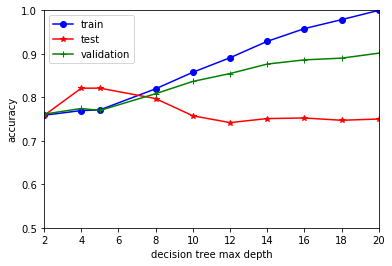

In [88]:
max_depth_input = [2,4,5,8,10,12,14,16,18,None] 
max_depth_output = [2,4,5,8,10,12,14,16,18,20] 
scores_depth = np.zeros((3, 10))
for i in range(10):
    scores_depth[:,i] = decision_tree(depth=max_depth_input[i], splits=0.2)
plot_graph(param=max_depth_output, scores=scores_depth, param_name='decision tree max depth',x_range=(2,20))

[[0.64390742 0.7183052  0.72463448]]
[[0.76559353 0.75835816 0.75015172]]
[[0.75822781 0.79432859 0.75326897]]
[[0.76807636 0.7579168  0.76118621]]
[[0.76708323 0.75405495 0.76256552]]
[[0.76887638 0.75416529 0.76684138]]
[[0.76959364 0.82103056 0.76849655]]


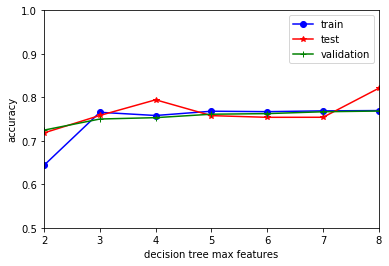

In [9]:
max_features = [2,3,4,5,6,7,8] 
scores_max_features = np.zeros((3, 7))
for i in range(7):
    scores_max_features[:,i] = decision_tree(splits=0.2, depth=4, features=max_features[i])
plot_graph(param=max_features, scores=scores_max_features, param_name='decision tree max features',x_range=(2,8))

[[0.7588899  0.75835816 0.76016552]]
[[0.7588899  0.75835816 0.75633103]]
[[0.7588899  0.75835816 0.75955862]]
[[0.7588899  0.75835816 0.76110345]]
[[0.7588899  0.75835816 0.75735172]]
[[0.79166322 0.74853801 0.78777931]]
[[0.80051863 0.74335209 0.79768276]]
[[0.81240862 0.81021737 0.81067586]]
[[0.82611934 0.81021737 0.8168    ]]
[[0.84611989 0.81176211 0.83848276]]


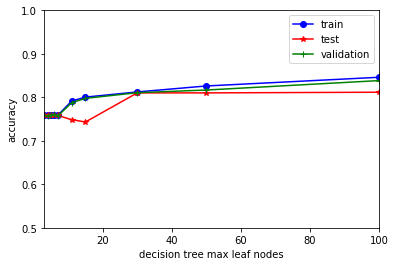

In [90]:
max_leaf_nodes = [3,4,5,6,7,11,15,30,50,100] 
score_max_leaf_nodes = np.zeros((3, 10))
for i in range(10):
    score_max_leaf_nodes[:,i] = decision_tree(splits=0.2, depth=None, maxleafnodes=max_leaf_nodes[i])
plot_graph(param=max_leaf_nodes, scores=score_max_leaf_nodes, param_name='decision tree max leaf nodes',x_range=(3,100))

In [95]:
from sklearn.neighbors import KNeighborsClassifier

def knneighbors(split=0.3, neighbors=5):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=split, random_state=3, shuffle=False)
    
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn = knn.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = knn.score(x_train, y_train)
    score[0,1] = knn.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(knn, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[1.         0.57826982 0.78943884]]
[[0.89381424 0.59621892 0.78969105]]
[[0.9039662  0.58812711 0.80854351]]
[[0.8800681  0.59989701 0.81040353]]
[[0.85210291 0.6057084  0.80507566]]
[[0.81344978 0.61828748 0.78814628]]
[[0.79629863 0.62593791 0.77909836]]
[[0.77776026 0.6363837  0.7610971 ]]
[[0.7454127  0.63528027 0.73546658]]
[[0.731036   0.62873326 0.71746532]]


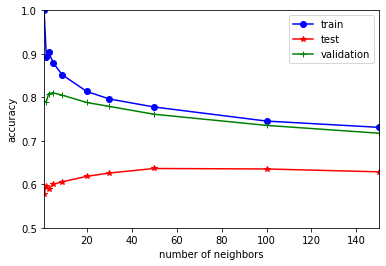

In [99]:
nb_neighbors = [1,2,3,5,9,20,30,50,100,150]
scores_nb_neighbors = np.zeros((3, 10))
for i in range(10):
    scores_nb_neighbors[:,i] = knneighbors(neighbors=nb_neighbors[i])
plot_graph(param=nb_neighbors, scores=scores_nb_neighbors, param_name='number of neighbors',x_range=(1,150))

[[0.77096616 0.63084731 0.75522315]]
[[0.77513862 0.63709588 0.75922759]]
[[0.77776026 0.6363837  0.75677806]]
[[0.78143966 0.64915862 0.76164031]]
[[0.7806762  0.64790784 0.76381289]]
[[0.78360185 0.63796528 0.76922228]]
[[0.78746414 0.63665311 0.76801471]]
[[0.78205694 0.65908966 0.75689085]]
[[0.76208343 0.62823374 0.73942731]]
[[0.68211921 0.52254843 0.65434783]]


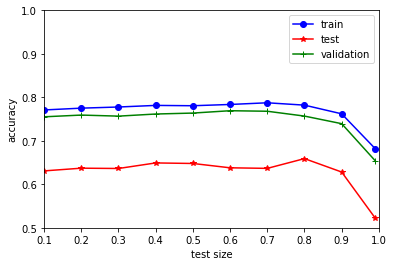

In [102]:
scores_n_neighbors_test_size = np.zeros((3, 10))
for i in range(10):
    scores_n_neighbors_test_size[:,i] = knneighbors(split=test_sizes[i], neighbors=50)
plot_graph(param=test_sizes, scores=scores_n_neighbors_test_size, param_name='test size',x_range=(0.1,1))

In [26]:
from sklearn.neural_network import MLPClassifier
def nn_mlp(splits=0.3, hls=5,slv='adam', actv='logistic',lr_init=0.1, randst=100):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    mlp = MLPClassifier(hidden_layer_sizes=(hls,), solver=slv, activation=actv, learning_rate_init=lr_init, random_state=randst)
    mlp.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = mlp.score(x_train, y_train)
    score[0,1] = mlp.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(mlp, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.7661844  0.82193292 0.7519127 ]]
[[0.76669701 0.58976056 0.76568276]]
[[0.77227442 0.7120053  0.77430643]]
[[0.78728804 0.64402759 0.79150423]]
[[0.81033722 0.71314442 0.81023831]]
[[0.81472081 0.73241871 0.81924986]]
[[0.83594497 0.69904474 0.83132353]]
[[0.81052748 0.44154483 0.82943771]]
[[0.81725888 0.46904196 0.81057269]]
[[0.70198675 0.6080831  0.6826087 ]]


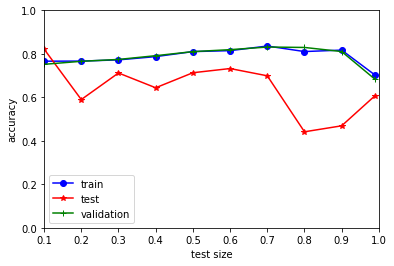

In [28]:
scores_nn_mlp_split = np.zeros((3, 10))
for i in range(10):
    scores_nn_mlp_split[:,i] = nn_mlp(splits=test_sizes[i],hls=3)
plot_graph(param=test_sizes, scores=scores_nn_mlp_split, param_name='test size',x_range=(0.1,1), y_range=(0,1))

[[0.74149093 0.62157988 0.74203041]]
[[0.7661844  0.82193292 0.75912212]]
[[0.76076508 0.82127096 0.75973516]]
[[0.76652771 0.84201236 0.76493379]]
[[0.77265817 0.7782436  0.77074546]]
[[0.77844532 0.80317741 0.76844041]]
[[0.77341834 0.82590468 0.76721432]]
[[0.77564983 0.79479259 0.76934772]]
[[0.7710152  0.82700794 0.77476704]]
[[0.77986758 0.80582524 0.77324669]]


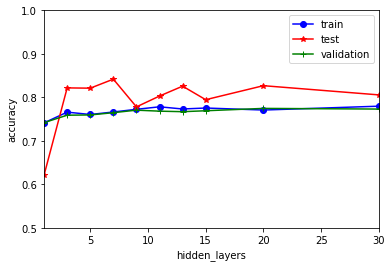

In [32]:
hidden_layers = [1,3,5,7,9,11,13,15,20,30] 
scores_hidden_layers = np.zeros((3, 10))
for i in range(10):
    scores_hidden_layers[:,i] = nn_mlp(hls=hidden_layers[i],splits=0.1)
plot_graph(param=hidden_layers, scores=scores_hidden_layers, param_name='hidden_layers',x_range=(1,30))

In [5]:
from sklearn.svm import SVC

def svm_svc(splits=0.3, kn='rbf'):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    svc = SVC(kernel=kn, gamma='auto')
    svc.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = svc.score(x_train, y_train)
    score[0,1] = svc.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(svc, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.74867582 0.82038835 0.74453163]]
[[0.746393   0.77391592 0.74278621]]
[[0.75669967 0.68780344 0.75252207]]
[[0.76705778 0.69693793 0.76406767]]
[[0.77136299 0.70917196 0.76906443]]
[[0.7677665  0.70696631 0.76287921]]
[[0.75310822 0.67167944 0.74948529]]
[[0.71827411 0.70857931 0.70683572]]
[[0.68925182 0.60824894 0.67643172]]
[[0.69094923 0.57618315 0.68043478]]


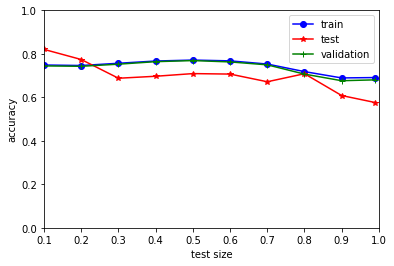

In [6]:
scores_svc_size = np.zeros((3, 10))
for i in range(10):
    scores_svc_size[:,i] = svm_svc(splits=test_sizes[i])
plot_graph(param=test_sizes, scores=scores_svc_size, param_name='test size',x_range=(0.1,1), y_range=(0,1))

[[0.75669967 0.68780344 0.75517024]]
[[0.49262249 0.49992644 0.52673392]]


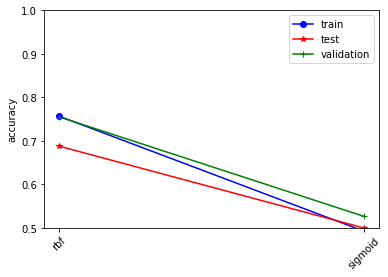

In [6]:
kernel_svc = ['rbf','sigmoid']
scores_kernel_svc = np.zeros((3, 2))
for i in range(2):
    scores_kernel_svc[:,i] = svm_svc(kn=kernel_svc[i])
plot_xticks_graph(param=kernel_svc, scores=scores_kernel_svc, x_names=kernel_svc, y_range=(0,1))

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def ada_boosting(splits=0.3, nestim=50, lr=1.):
    x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=splits, random_state=3, shuffle=False)

    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=nestim, learning_rate=lr)
    boost.fit(x_train, y_train)
    
    score = np.zeros((1,3))
    score[0,0] = boost.score(x_train, y_train)
    score[0,1] = boost.score(x_test, y_test)
    cv = ShuffleSplit()
    cv_scores = cross_val_score(boost, x_train, y_train, cv=cv)
    
    score[0,2] = cv_scores.mean()
    
    print(score)
    
    return score

[[0.74855321 0.83693733 0.74732712]]
[[0.74855321 0.83693733 0.74551251]]
[[0.76660128 0.83318623 0.76461501]]
[[0.77290338 0.82524272 0.77204512]]
[[0.77464443 0.83230362 0.77618931]]
[[0.79153997 0.83164166 0.78818048]]
[[0.81755763 0.81774051 0.81603727]]
[[0.82329573 0.81376876 0.81819519]]
[[0.82717018 0.81575463 0.82555174]]
[[0.84256989 0.80847308 0.84232467]]


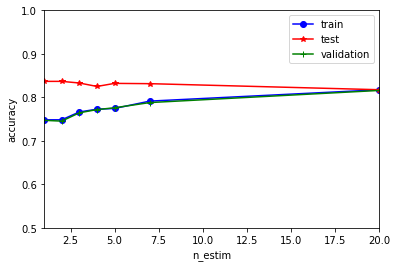

In [31]:
n_estim = [1,2,3,4,5,7,20,25,30,50] 
scores_n_estim = np.zeros((3, 10))
for i in range(10):
    scores_n_estim[:,i] = ada_boosting(nestim=n_estim[i],splits=0.1)
plot_graph(param=n_estim, scores=scores_n_estim, param_name='n_estim',x_range=(1,20))

[[0.75100539 0.83495146 0.7492153 ]]
[[0.7595244 0.7727022 0.7592   ]]
[[0.75761397 0.77342945 0.76065574]]
[[0.79743995 0.72154483 0.7971313 ]]
[[0.80398129 0.71892655 0.8037511 ]]
[[0.8136173  0.7199132  0.81367899]]
[[0.83763702 0.7249598  0.83602941]]
[[0.82972854 0.73936552 0.82293275]]
[[0.82564555 0.74993257 0.82797357]]
[[0.88300221 0.59704853 0.86086957]]


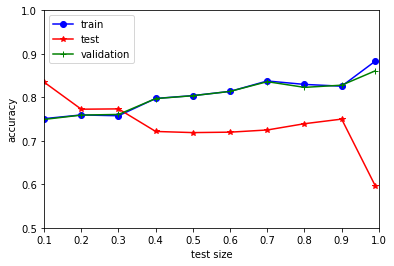

In [8]:
scores_adabost_split = np.zeros((3, 10))
for i in range(10):
    scores_adabost_split[:,i] = ada_boosting(splits=test_sizes[i],nestim=5)
plot_graph(param=test_sizes, scores=scores_adabost_split, param_name='test size',x_range=(0.1,1))